using pca and lda model
(9377, 31)


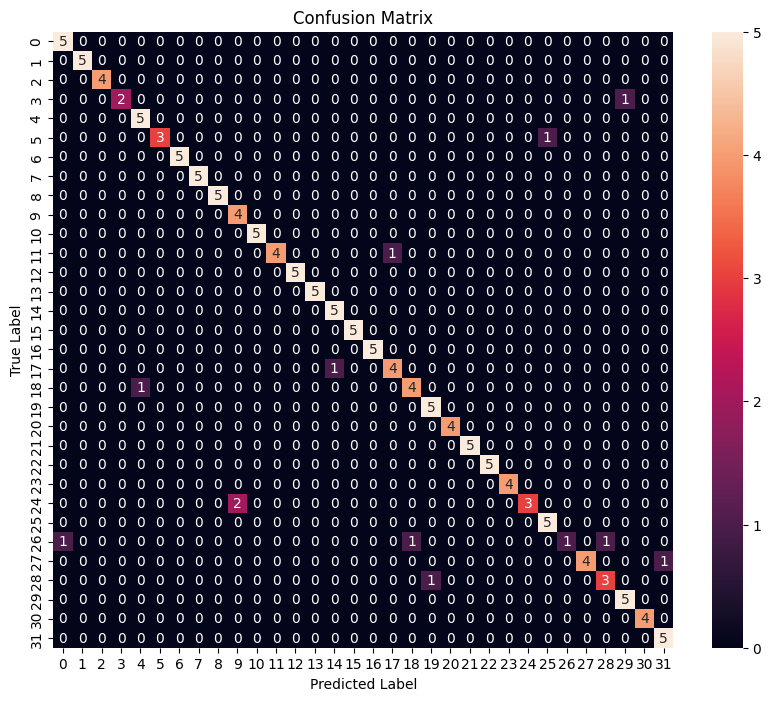

Accuracy: 0.9995734243361416 0.92


In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_dir = 'dimension_reduced_data'

use_pca = True
use_lda = True

if use_pca and not use_lda:
    print('using pca model')

    X_train = np.load('dimension_reduced_data/X_train_pca.npy')
    X_val = np.load('dimension_reduced_data/X_val_pca.npy')

if use_lda and not use_pca:
    print('using lda model')

    X_train = np.load('dimension_reduced_data/X_train_lda.npy')
    X_val = np.load('dimension_reduced_data/X_val_lda.npy')

if use_pca and use_lda:
    print('using pca and lda model')

    X_train = np.load('dimension_reduced_data/X_train_pca_lda.npy')
    X_val = np.load('dimension_reduced_data/X_val_pca_lda.npy')

y_train = np.load('dimension_reduced_data/y_train.npy')
y_val = np.load('dimension_reduced_data/y_val.npy')

print(X_train.shape)

# Define base learners
knn_1 = KNeighborsClassifier(n_neighbors=5)
knn_2 = KNeighborsClassifier(n_neighbors=10)
knn_3 = KNeighborsClassifier(n_neighbors=15)

# Train base learners
knn_1.fit(X_train, y_train)
knn_2.fit(X_train, y_train)
knn_3.fit(X_train, y_train)

# Make predictions
yp_train_1 = knn_1.predict(X_train)
yp_train_2 = knn_2.predict(X_train)
yp_train_3 = knn_3.predict(X_train)

# Ensemble predictions (e.g., simple majority voting)
yp_train_ensemble = np.array([np.argmax(np.bincount([yp_train_1[i], yp_train_2[i], yp_train_3[i]])) for i in range(len(yp_train_1))])

# Calculate training accuracy
training_accuracy = accuracy_score(y_train, yp_train_ensemble)

# Make predictions on validation data
yp_val_1 = knn_1.predict(X_val)
yp_val_2 = knn_2.predict(X_val)
yp_val_3 = knn_3.predict(X_val)

# Ensemble predictions for validation data
yp_val_ensemble = np.array([np.argmax(np.bincount([yp_val_1[i], yp_val_2[i], yp_val_3[i]])) for i in range(len(yp_val_1))])

# Calculate validation accuracy
validation_accuracy = accuracy_score(y_val, yp_val_ensemble)

# Calculate confusion matrix for validation data
cm = confusion_matrix(y_val, yp_val_ensemble)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

print("Accuracy:", training_accuracy, validation_accuracy)
